In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
import seaborn as sns

In [ ]:
mnist_train= pd.read_csv('/content/MNIST_train.csv')
mnist_train

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,59995,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,59996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,59997,59997,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,59998,59998,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist_test= pd.read_csv('/content/MNIST_test.csv')
mnist_test

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,9996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,9997,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,9998,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=mnist_train.to_numpy()

In [ ]:
X2=mnist_test.to_numpy()

In [ ]:
y_train=X[:,2]

In [ ]:
X_tran= X[:,3:]

In [ ]:
y_test=X2[:,2]

In [ ]:
X_test=X2[:,3:]

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8])

In [ ]:
X_tran

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_tran.shape

(60000, 784)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
y_test.shape

(10000,)

In [ ]:
def show_me(X_train):
    plt.imshow(X_train.reshape(28,28))

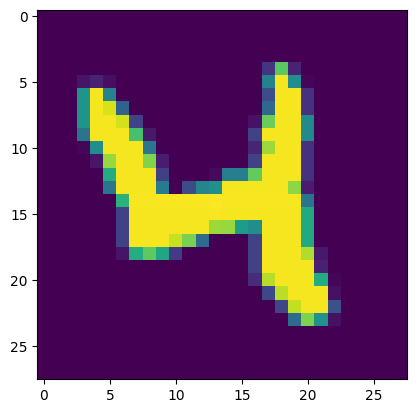

In [ ]:
show_me(X_tran[20])

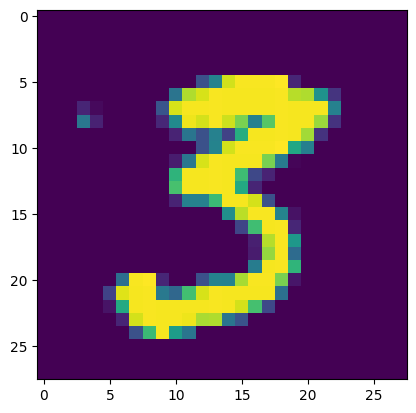

In [ ]:
show_me(X_tran[49])

# **Normalize Data**

In [ ]:
X_train=(X_tran-X_tran.min())/X_tran.max()
X_test= (X_test-X_test.min())/X_test.max()

In [ ]:
X_train=X_tran/255
X_test=X_test/255

In [ ]:
class  GaussBayes():

  def fit(self, X_train,y_train,epsilon =1e-3):
    self.likelihoods=dict()
    self.priors=dict()

    self.K = set(y_train.astype(int))

    for k in self.K:
      X_train_k = X_train[y_train==k,:]

      N_k, D =X_train_k.shape
      mu_k = X_train_k.mean(axis=0)

      self.likelihoods[k] = {"mean": X_train_k.mean(axis=0),
      "cov":(1/(N_k-1))*np.matmul((X_train_k-mu_k).T,X_train_k-mu_k )
      +epsilon*np.identity(D)}
      self.priors[k] =len(X_train_k)/len(X_train)

  def predict(self, X_train):
    N,D =X_train.shape
    P_hat = np.zeros((N, len(self.K)))
    for k, l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X_train, l["mean"], l["cov"])+ np.log(self.priors[k])

    return P_hat.argmax(axis=1)

In [ ]:
def accuracy (y_train,y_train_hat):
  return np.mean(y_train==y_train_hat)

In [ ]:
gnb = GaussBayes()

In [ ]:
gnb.fit(X_train,y_train)

In [ ]:
y_train_hat = gnb.predict(X_train)

In [ ]:
accuracy(y_train,y_train_hat)

0.9306333333333333

In [ ]:
y_predic = gnb.predict(X_test)

Text(0.5, 47.7222222222222, 'Predicted label')

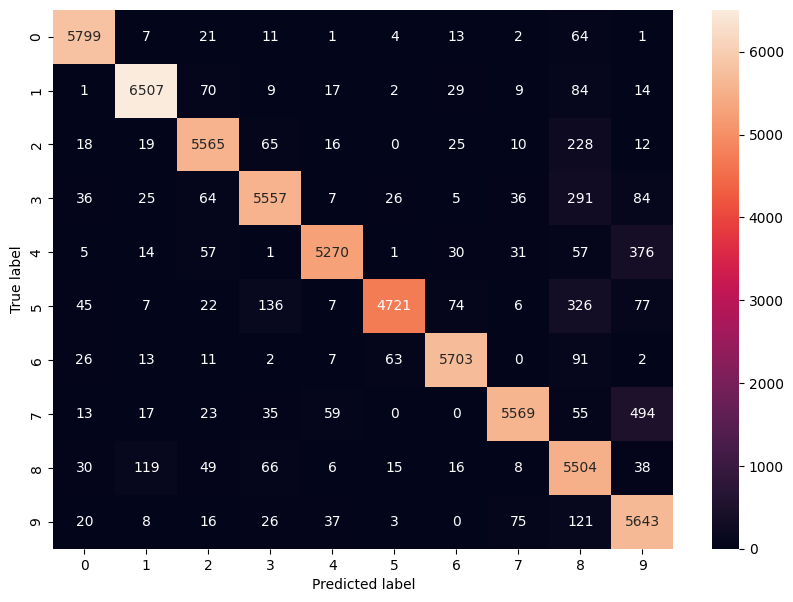

In [ ]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_train, name='Actual')
y_pred = pd.Series(y_train_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

<Axes: xlabel='Predicted', ylabel='Actual'>

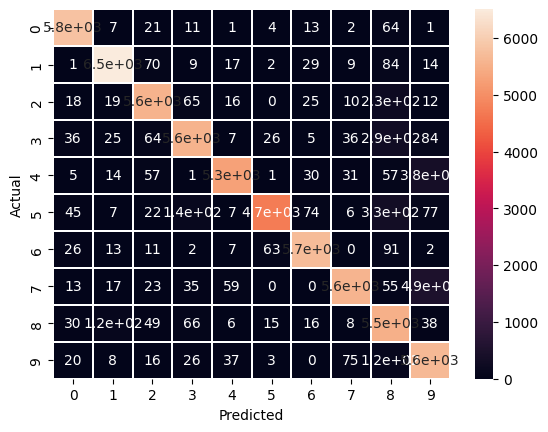

In [ ]:
sns.heatmap(cm, annot=True, linewidths = 0.01)

In [ ]:
def show_me(X_train):
    plt.imshow(X.reshape(28,28))

def show_me_allmean(X_train,y_train,k):
    show_me(sum(X_train[y_train==k,:]/len(X_train[y_train==k,:])))

In [ ]:
show_me_allmean(X_train,y_train,5)

ValueError: ignored

In [ ]:
def show_me(X_test):
    plt.imshow(X_test.reshape(28,28))
def show_me_allmean(X_test,y_test,k):
    show_me(sum(X_test[y_test==k,:]/len(X_test[y_test==k,:])))

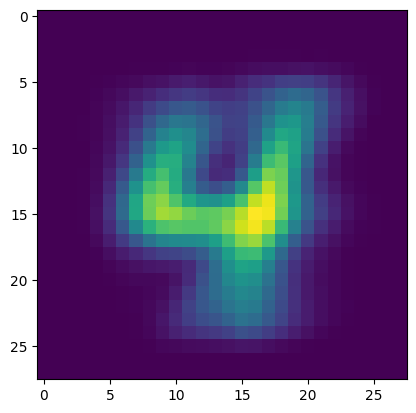

In [ ]:
show_me_allmean(X_test,y_test,4)

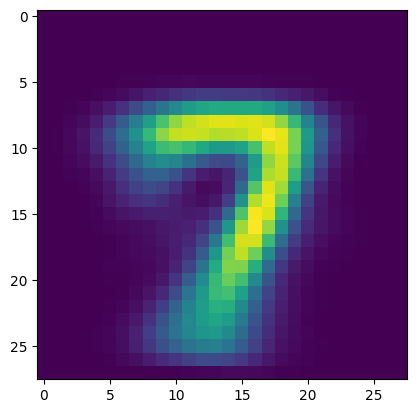

In [ ]:
show_me_allmean(X_test,y_test,7)

In [ ]:
show_me_allmean(X_test,y_test,6)

In [ ]:
show_me_allmean(X_test,y_test,9)

In [ ]:
show_me_allmean(X_test,y_test,3)

In [ ]:
show_me_allmean(X_test,y_test,8)

In [ ]:
show_me_allmean(X_test,y_test,2)

In [ ]:
show_me_allmean(X_test,y_test,5)

In [ ]:
show_me_allmean(X_test,y_test,0)

In [ ]:
show_me_allmean(X_test,y_test,1)

In [ ]:
def OLS(Y,Y_hat,N):
  return (1/(2*N)*np.sum((Y-Y_hat)**2))
def R2(Y,Y_hat):
  return (1-(np.sum((Y-Y_hat)**2)/np.sum((Y-np.mean(Y))**2)))

In [ ]:
class MVlinearRegression():
  def fit(self,X,y, eta=1e-3, epochs=1e3, show_curve=False):
    epochs=int(epochs)
    N, D =X.shape
    Y=y

    ##Begin Optimization
    self.W=np.random.randn(D)
    J=np.zeros(epochs)

    for epoch in range(epochs):
      Y_hat=self.predict(X)
      J[epoch]= OLS(Y,Y_hat,N)
      #weight update Rule:
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.Xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
      plt.show()

  def predict(self,X):
    return X@self.W